## Web scraping and pickling 
Data was acquired and pickled in another notebook. To see the full steps and details regarding this step, head to the project-02-pickling.ipynb file. In this step I'm only reading the dataframe from a pickle file generated from the mentioned notebook.

In [1]:
import pickle

In [2]:
pickle_in = open("products_df_bs.pickle","rb")
products_df = pickle.load(pickle_in)

In [3]:
len(products_df)

1091

## Data Preprocessing and Feature Engineering  
##### Initial cleaning
* Remove non-numerical characters from the price features.
* Convert non-numerical dimentions into float datatypes.
* Handle NaN values.
* Delete rows with no target values or with target value quals to zero.



In [4]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#  Options 
pd.set_option("display.max_rows", 1091)

In [6]:
def init_cleaning(dataframe):
#     remove non-numerical characters from the price features.
    dataframe['price'] = [re.sub("[^0-9]", '', price) for price in dataframe['price']]
    
#     Convert non-numerical dimentions into float datatype.
    dataframe['item_package_quantity'] = pd.to_numeric(dataframe['item_package_quantity'])
    dataframe['gross_wieght'] = pd.to_numeric(dataframe['gross_wieght'])
    dataframe['net_wieght'] = pd.to_numeric(dataframe['net_wieght'])
    dataframe['ring_size'] = pd.to_numeric(dataframe['ring_size'])
    dataframe['carat_CT'] = pd.to_numeric(dataframe['carat_CT'])
    dataframe['diamond_pcs'] = pd.to_numeric(dataframe['diamond_pcs'])
    dataframe['price'] = pd.to_numeric(dataframe['price'])  
    
#     Handle NaN values
    dataframe["diamond_pcs"].fillna(value=0, inplace=True)
    dataframe["carat_CT"].fillna(value=0, inplace=True)
    for index, row in dataframe.iterrows():
        if dataframe['item_package_quantity'][index] != 1 or dataframe['item_package_quantity'][index] != 2:
            if dataframe['product_type'][index] == "Earring":
                dataframe['item_package_quantity'][index] = 2
            else:
                dataframe['item_package_quantity'][index] = 1
    dataframe = dataframe.drop(columns = ['ring_size'])
#     dataframe = dataframe.dropna(subset=['gross_wieght'])
#     Exclude rows with no price value 
    dataframe = dataframe[dataframe['price'] != 0.0]
    return dataframe

In [7]:
def transform_purity(dataframe):
    #     convert purity from categorical to float 
    dataframe['purity_KT'] = [purity.split(' ')[0] for purity in dataframe['purity_KT']]
    dataframe['purity_KT'] = [0.917 if purity == "22" else 0.75 for purity in dataframe['purity_KT']]
    return dataframe

In [8]:
def transform_brand(dataframe):
#     plot before transformation 
    brand_count = dataframe.brand.value_counts()
    plt.bar(brand_count.index, brand_count)
    plt.xlabel('Brands', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.title('Brand Frequency Values')
    plt.show()
#     transform 
    dataframe['brand_Malabar'] = dataframe.brand.apply((lambda x: 1 if (x == 'Malabar') else 0))
    dataframe['brand_Mine'] = dataframe.brand.apply(lambda x: 1 if x == 'Mine' else 0)
    dataframe.drop(['brand'], inplace= True, axis=1)
#     plot after transformation 
    x = ['brand Malabar', 'brand Mine', 'others']
    y_pos = np.arange(len(x))
    y = [len(dataframe[dataframe['brand_Malabar'] == 1]), len(dataframe[dataframe['brand_Mine'] == 1]), len(dataframe[(dataframe['brand_Mine'] == 0) & (dataframe['brand_Malabar'] == 0)])]
    plt.bar(y_pos, y)
    plt.xticks(y_pos, x)
    plt.xlabel('Brands', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.title('Brand Frequency Values After One-hot Encoding')
    plt.show()
    return dataframe

In [9]:
def transform_gender(dataframe):
#     plot before transformation 
    gender_count = dataframe.gender.value_counts()
    plt.bar(gender_count.index, gender_count, color = 'red')
    plt.xlabel('Gender', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.title('Gender Frequency Values')
    plt.show()
#     transform 
    gender_dummy = pd.get_dummies(dataframe['gender']).iloc[:,3:]
    dataframe['gender_women'] = gender_dummy
    dataframe.drop(['gender'], inplace= True, axis=1)
#     plot after transformation 
    x = ['ًWomen', 'others']
    y_pos = np.arange(len(x))
    y = [len(dataframe[dataframe['gender_women'] == 1]), len(dataframe[dataframe['gender_women'] == 0])]
    plt.bar(y_pos, y, color = 'red')
    plt.xticks(y_pos, x)
    plt.xlabel('Gender', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.title('Gender Frequency Values After One-hot Encoding')
    plt.show()
    return dataframe

In [10]:
def transform_metal_color(dataframe):
#     plot before transformation 
    metal_color_count = dataframe.metal_color.value_counts()
    plt.bar(metal_color_count.index, metal_color_count, color = 'green')
    plt.xlabel('Metal Color', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.title('Metal color Frequency Values Before Transformation')
    plt.show()
    
#     transform 
    metal_color_dummy = pd.get_dummies(dataframe['metal_color']).iloc[:, 7:]
    dataframe['metal_color_yellow'] = metal_color_dummy
    dataframe.drop(['metal_color'], inplace= True, axis=1)

#     plot after transformation 
    x = ['Yellow', 'Others']
    y_pos = np.arange(len(x))
    y = [len(dataframe[dataframe['metal_color_yellow'] == 1]), len(dataframe[dataframe['metal_color_yellow'] == 0])]
    plt.bar(y_pos, y, color = 'green')
    plt.xticks(y_pos, x)
    plt.xlabel('Metal Color', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.title('Metal Color Frequency Values After Transformation')
    plt.show()
    return dataframe

In [11]:
def transform_g_cert(dataframe):
#     transform 
    g_cert_dummy = pd.get_dummies(dataframe['g_cert'])
    dataframe['g_cert_916'] = g_cert_dummy.iloc[:,2:]
    dataframe['g_cert_750'] = g_cert_dummy.iloc[:,1:2]
    dataframe.drop(['g_cert'], inplace= True, axis=1)
    return dataframe

In [12]:
def transform_d_cert(dataframe):
#     transform 
    d_cert_dummy = pd.get_dummies(dataframe['d_cert']).iloc[:,1:]
    dataframe['IGI_cert'] = d_cert_dummy
    dataframe.drop(['d_cert'], inplace= True, axis=1)
    return dataframe

In [13]:
def transform_product_type(dataframe):
#     transform 
    product_type_dummy = pd.get_dummies(dataframe['product_type'])
    dataframe['ring'] = product_type_dummy.iloc[:,3:]
    dataframe['earring'] = product_type_dummy.iloc[:,1:2]
    dataframe.drop(['product_type'], inplace= True, axis=1)
    return dataframe

In [14]:
def transform_diamond_color(dataframe):
#     transform 
    diamond_color_dummy = pd.get_dummies(dataframe['diamond_color'])
    dataframe['GH'] = diamond_color_dummy.iloc[:,3:4]
    dataframe.drop(['diamond_color'], inplace= True, axis=1)
    return dataframe

In [15]:
initially_cleaned_df = init_cleaning(products_df)

/Users/hi/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/hi/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
# with open('initially_cleaned_df.pkl', 'wb') as picklefile:
#     pickle.dump(initially_cleaned_df, picklefile)

In [17]:
initially_cleaned_df.shape

(1040, 14)

##### Feature transformation 
* __Purity (KT):__ Convert the purity_KT dimention from categorical into float representing the gold percentage. In this dataset, the unique values of this column are 22 and 18 only. 22 category is represented with a 0.917 purity percentage and 18 is represented with 0.75 purity percentage.


In [18]:
transformed_purity = transform_purity(initially_cleaned_df)

* __Brand:__ From visualizing the distribution of values at the brand dimention, I noticed that the majority of data are clustering on the Malabar and Mine brand bars. Therefore, only Malabar and Mine brands are kept as dimentions and any brand other than these two will reflect to neither.


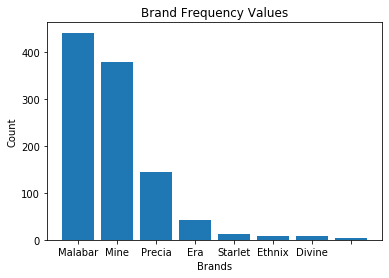

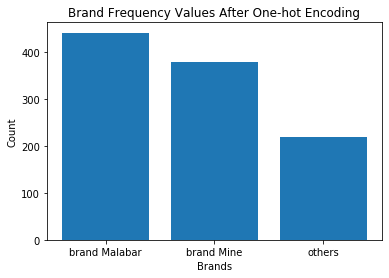

In [19]:
encoded_brands = transform_brand(transformed_purity)

* __Gender:__ The gender dimention contains the unique values (Women, Kids, Men, and none). Looking at the values distribution in the bar chart, Women category records a significantly high count against the other categories. Therefore, this feature will be transformed into a Women_gender feature where 1 equals to women and 0 equals others.



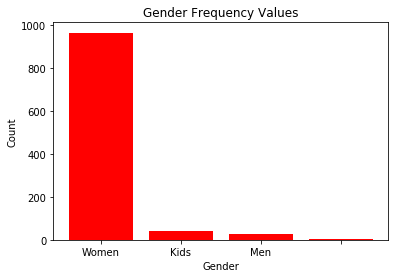

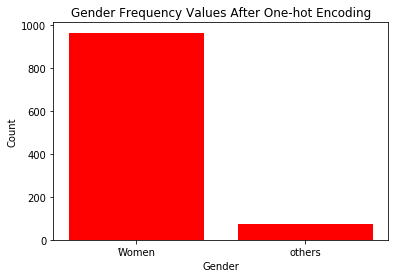

In [20]:
encoded_gender = transform_gender(encoded_brands)

* __Metal Color:__ The unique values of the metal dimention and their frequencies are shown in the table below:

| Meta Color    | Count         |
| ------------- |:-------------:|
| Yellow        | 718           |
| Rose          | 129           |
| Two Tone      | 108           |
| White         | 44            |
| Two tone      | 31            |
| NaN           | 6             |
| Multicolour   | 2             |
| Three Tone    | 2             |


Looking at the table and values distribution, Yellow records a significantly high count value against the other colors. Therefore, this feature will be transformed into a metal_color_yellow feature where 1 equals to yellow and 0 equals other color values.


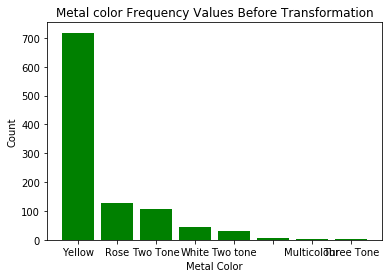

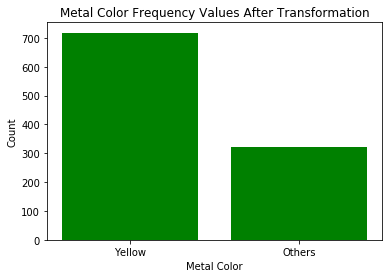

In [21]:
encoded_metal_color = transform_metal_color(encoded_gender)


* __Gold Cetrificate:__ This feature represented in the dataset with the "g_cert" dimention and its value counts are recorded in the table below:

|Certificate Name|Count|
|----------------|:---:|
|None            |604  |
|916             |316  |
|750             |120  |

Looking at the table, it seems to me it wouldn't be fair to keep one dummy variable only due to the following reasons:

1. The significantly high count belongs to items which has no certificate.
2. The frequency count is not culstering at a single valuable certificate as much as the previous features were heavily clustered on a single feature.

Therefore, for this case, I decided to include all of this feature values as dummy variables.



In [22]:
encoded_g_cert = transform_g_cert(encoded_metal_color)

* __Diamond Certificate:__ This feature represented in the dataset with the "d_cert" dimention and its value counts are recorded in the table below:

|Certificate Name|Count|
|----------------|:---:|
|None            |868  |
|IGI             |172  |

       
The unique values number on this feature makes it easier to choose whether to keep all values as dummy variables or not. Since it's binary, this limits our dicision to the rule of thumb of dummy variables number. Which is { k-1 | k = len( d_cert.unique() ) } 

In [23]:
encoded_d_cert = transform_d_cert(encoded_g_cert)

* __Product Type:__  This table shows the frequency values for each category in the product_type dimention:

|Product Type    |Count|
|----------------|:---:|
|Ring            |475  |
|Earring         |368  |
|Pendant         |194  |
|NaN             |3    |

Since there is no value which holds the majority of data, I've decided to use the top 2 values as my dummy variables for this feature.

In [24]:
encoded_product_type = transform_product_type(encoded_d_cert)

In [25]:
encoded_product_type.diamond_color.value_counts()

      672
GH    365
G       1
FG      1
HI      1
Name: diamond_color, dtype: int64

In [26]:
encoded_diamond_color = transform_diamond_color(encoded_product_type)

In [33]:
removed_nan_rows = encoded_diamond_color.dropna()